In [1]:
import pandas as pd, os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
import plotly.express as pe 
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
df = pd.read_csv(os.getcwd()+"\\data\\norway_new_car_sales_by_make.csv")
df['Date']= pd.to_datetime(df['Year'].astype(str)+ df['Month'].astype(str), format='%Y%m')
df = (df.loc[df["Make"] == 'Toyota',["Date","Quantity"]]
        .rename(columns={"Quantity":"Sales"}).set_index("Date"))
df = df.iloc[1:]
df.head()

,Sales
Date,
2007-02-01,1885
2007-03-01,1833
2007-04-01,1300
2007-05-01,1866
2007-06-01,1620


<AxesSubplot:xlabel='Date'>

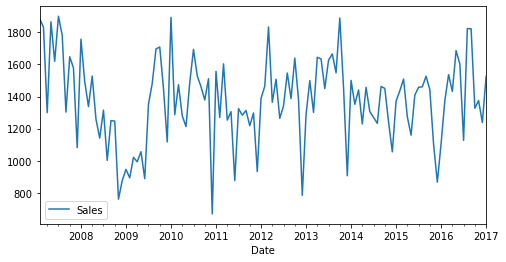

In [5]:
df.plot(figsize=(8,4))

histograms have arbitary bins and the transitions are not smooth. So we use KDE.

In [6]:
kde_dist = gaussian_kde(df['Sales'], bw_method='scott')


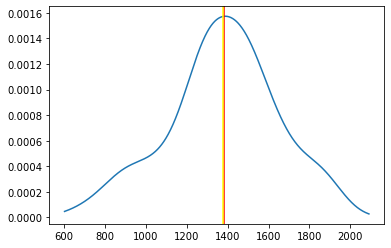

In [7]:
x = np.linspace(df['Sales'].min()*0.9, df['Sales'].max() * 1.1, 1000)
y_kde = kde_dist.pdf(x)
plt.plot(x, y_kde) 
plt.axvline(df.Sales.median(), color='red')
plt.axvline(df.Sales.mean(), color='yellow')

find out CDF (cumulative distribution function)

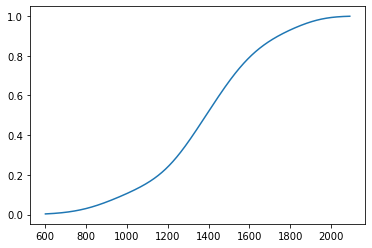

In [8]:
def kde_cdf(kde_dist,x):
  cdf = []
  for value in x:
    cdf.append(kde_dist.integrate_box_1d(-np.inf,value))
  return cdf
plt.plot(x,kde_cdf(kde_dist,x))

merge plots together 

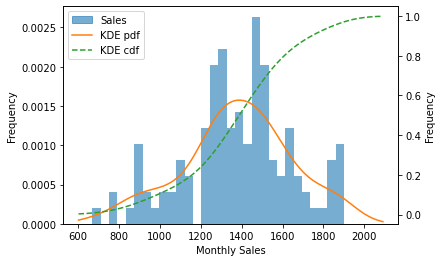

In [9]:
import matplotlib.patches as mpatches 
fig, ax = plt.subplots() 
df['Sales'].plot(ax=ax, kind='hist',density=True, bins=30, alpha=0.6)
patch = mpatches.Patch(color='C0',alpha=0.6,label='Sales')
x= np.linspace(df['Sales'].min() * 0.9, df['Sales'].max() * 1.1, 1000)
y_kde = kde_dist.pdf(x)
plot2 = ax.plot(x,y_kde, lw=1.5)
ax.set_xlabel('Monthly Sales')
ax1=ax.twinx()
ax1.set_ylabel('Frequency')
plot3 = ax1.plot(x, kde_cdf(kde_dist,x), ls='--',color='C2',lw=1.5)
ax.legend([patch]+plot2+plot3,['Sales','KDE pdf','KDE cdf'],loc='upper left')
plt.show()



In [10]:
from scipy.stats import poisson
simulated_request_per_minute = poisson.rvs(3.3, size=1_000_000)
print(np.percentile(simulated_request_per_minute, 90))

6.0


In [11]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Histogram(x=df.Sales.values,histnorm='probability density')])

fig.show()

In [12]:
print(kde_cdf(kde_dist,x))
print(df.Sales.values)
print(np.random.randn(500))

[0.0030866014233715, 0.0031576181194817527, 0.0032298952077932865, 0.0033034471704552226, 0.003378288551784115, 0.0034544339590153596, 0.0035318980631120515, 0.0036106955996293546, 0.003690841369632283, 0.0037723502406645307, 0.0038552371477658283, 0.003939517094535108, 0.00402520515423648, 0.004112316470944929, 0.004200866260728327, 0.00429086981286225, 0.004382342491073789, 0.004475299734810498, 0.004569757060530144, 0.004665730063007115, 0.004763234416650824, 0.004862285876831409, 0.0049629002812078115, 0.00506509355105318, 0.005168881692572278, 0.005274280798205523, 0.005381307047914038, 0.00548997671043992, 0.005600306144535936, 0.005712311800158471, 0.0058260102196176855, 0.005941418038678465, 0.006058551987605798, 0.006177428892148067, 0.006298065674451581, 0.0064204793538996455, 0.006544687047869388, 0.006670705972399486, 0.006798553442761764, 0.006928246873929847, 0.007059803780937753, 0.007193241779121437, 0.007328578584236208, 0.007465832012443035, 0.007605019980156667, 0.00